In [1]:
%cd C:\Users\yukir\Documents\GitHub\Text_Mining\py

from nlp_processing import *
from text_preprocessing import *
set_global_determinism(seed=1337)

%cd C:\Users\yukir\Documents\Monicas_workspace\mega_trend

C:\Users\yukir\Documents\GitHub\Text_Mining\py
True
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6699433521304877890
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 16295184274250834817
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9883535296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16153464370848355854
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 11811411053476496018
physical_device_desc: "device: XLA_GPU device"
]
tf 2.2.0
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라


C:\Users\yukir\anaconda3\envs\NLP\lib\site-packages\scipy\io\matlab\mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from .mio5_utils import VarReader5


C:\Users\yukir\Documents\Monicas_workspace\mega_trend


Text(0.5, 1.0, '안녕')

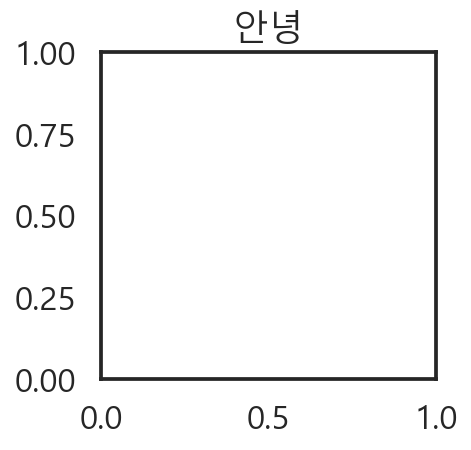

In [2]:
plt.figure(figsize = (3,3))
plt.rc('font', family='Malgun Gothic') 
%config InlineBackend.figure_format = 'retina'
plt.title("안녕")


In [3]:
from nltk.corpus import stopwords  
stopwords.words('korean')[:10] 

stopwords_kor = stopwords.words('korean')

In [4]:
def clean_text(text): 
    """ 한글, 영문, 숫자만 남기고 제거한다. 
    :param text: 
    :return: 
    """ 
    text = text.replace(".", " ").strip() 
    text = text.replace("·", " ").strip()
    pattern = '[^ ㄱ-ㅣ가-힣|0-9|a-zA-Z]+' 
    text = re.sub(pattern=pattern, repl='', string=text) 
    return text 
    
def get_nouns(tokenizer, sentence): 
    """ 단어의 길이가 2이상인 일반명사(NNG),
     고유명사(NNP), 외국어(SL)만을 반환한다. 
     :param tokenizer: 
     :param sentence: :return: """ 
    tagged = tokenizer.nouns(sentence)
    nouns = [s for s in tagged if len(s)>1] 
     
    return nouns 
     
def tokenize(clean_example): 
    tokenizer = okt
    processed_data = [] 
    for sent in tqdm(clean_example):
        sentence = clean_text(sent.replace('\n', '').strip()) 
        processed_data.append(get_nouns(tokenizer, sentence)) 
        
    return processed_data
    
    
def save_processed_data(processed_data): 
    """ 토큰 분리한 데이터를 csv로 저장 :param processed_data: :return: """ 
    
    with open('tokenized.csv', 'w', newline='', encoding='utf-8') as f: 
        writer = csv.writer(f) 
        for data in processed_data:
             writer.writerow(data)

In [5]:
from konlpy.tag import Okt
okt = Okt()

In [6]:
f = open('example\\mega_exm.txt','r',encoding='utf-8')
lines =f.readlines()

In [7]:
clean_example = []

for i in lines:
    k = clean_text(i)
    # text = re.sub('\n','',k)
    # print(text)
    k = k.strip()
    k = k.replace('\n','')
    p = re.compile("[^0-9]")
    k = ("".join(p.findall(k)))
    if k==[] or '':
        pass
    elif k=='':
        pass
    elif len(k)<=2:
        pass
    else:   
        clean_example.append(k)

len(clean_example)

2578

In [8]:
clean_example[:20]

['년도 보건복지부 RD 사업',
 '통합 시행계획안',
 '    ',
 '순    서',
 '보건의료 RD 정책여건 ',
 '보건복지부 RD 현황 ',
 '년 보건복지부 RD 중점 추진방향 ',
 '년 보건복지부 RD 사업 통합 시행계획 ',
 '세부사업별 추진계획 및 주요 내용 ',
 '보건의료 RD 정책 여건',
 '감염병 상시화에 대비하는 국가 역할의 중요성 증대',
 '코로나 장기화로 인한 포스트 코로나 시대의 도래',
 '전 세계를 강타한 초유의 감염병 위기 상황에서 국가와 정부의 체계적인 대응 여부는 국민의 안전과 직결',
 '우리나라는 유행의 심각성과 방역 강도에 따른 사회적 거리두기 철저한 역학조사에 따른 선제적 진단 검사 등으로 대응',
 'T검사 확진Test 역학 추적Trace 격리 치료Treat',
 '코로나의 완벽한 종식은 불가능하며 신 변종 바이러스로 인해 위험이 일상화되는 사회로 돌입',
 'WHO 코로나 팬데믹세계적 대유행이 엔데믹주기적 발병이 될 수도 있다고 지적 ',
 '미래 신종 감염병에 대비하는 국가적 위기대응역량 강조',
 '전 세계는 코로나 치료제 백신 개발에 경쟁적으로 투자하며 국가 차원의 치료제 백신 주권 확보에 총력',
 '화이자 모더나 아스트라제네카 백신 FDA 긴급사용승인 신청 ']

In [9]:
## 오래걸리니까 조심
def tokenize(clean_example): 
    tokenizer = okt
    processed_data = [] 
    for sent in tqdm(clean_example):
        sentence = clean_text(sent.replace('\n', '').strip()) 
        processed_data.append(get_nouns(tokenizer, sentence)) 
        
    return processed_data
    
    
def save_processed_data(processed_data): 
    """ 토큰 분리한 데이터를 csv로 저장 :param processed_data: :return: """ 
    
    with open('tokenized_TFIDF.csv', 'w', newline='', encoding='utf-8') as f: 
        writer = csv.writer(f) 
        for data in processed_data:
             writer.writerow(data)


from tqdm import tqdm 
if __name__ == '__main__':
     # df = pd.read_csv('negative.csv', index_col = 0)
     processed_data = tokenize(clean_example) # description 부분을 토크나이징 한다. 
     
     # 토큰 분리한 데이터를 저장 
     save_processed_data(processed_data)


100%|██████████| 2578/2578 [00:06<00:00, 391.36it/s] 


## **TF-IDF**

In [41]:
detokenized_doc = []
for i in range(len(processed_data)):
    t = ' '.join(processed_data[i])
    detokenized_doc.append(t)

import pandas as pd
df = pd.DataFrame({'detokenized_doc':detokenized_doc})
df = df.dropna()
df.head()

,detokenized_doc
0,년도 보건복지부 사업
1,통합 시행 계획
2,
3,
4,보건 의료 정책 여건


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word',       
                             min_df=0,                        # minimum reqd occurences of a word 
                             stop_words=stopwords_kor,             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[가-힣0-9]{1,}',  # num chars > 3
                             max_features=2000,             # max number of uniq words
                            ) 
data_vectorized_TFIDF = vectorizer.fit_transform(df['detokenized_doc'])
data_vectorized_TFIDF.shape # TF-IDF 행렬의 크기 확인

(2578, 1252)

In [43]:
# Materialize the sparse data
data_dense = data_vectorized_TFIDF.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  0.4148831226128187 %


In [54]:
### vocab에서 raw data 전처리 다시 시도 필요
import pickle

vocab = vectorizer.get_feature_names()

f = open('tfidf_voc.txt', 'w', encoding='utf-8')
for i in vocab:
    f.write(i+'\n')

f.close()

print(len(vocab))
vocab[:10]

1252


['가능', '가능성', '가상', '가이드라인', '가장', '가정', '가족', '가치', '가칭', '간년']

In [39]:
pd.DataFrame(data_vectorized_TFIDF[:].toarray(), columns=vocab).head()

,가능,가능성,가상,가이드라인,가족,가치,감소,감시,감염,감염병,강화,개념,개발,개방,개선,개시,개인,개인정보,개정,거동,거점,거창,건강,건립,건의,검사,검증,게재,경쟁력,경제,계층,계획,고도화,고려,고령,고령자,고령화,공고,공공,공공기관,공단,공동,공모,공유,공익,공중보건,공통,과기부,과제,과학,...,프로젝트,플랫폼,피부,피하,필요,학습,한국,한국인,합계,합성,항바이러스제,항생제,해결,해당,핵심,향상,허가,헬리,헬스,혁신,현장,현황,혈관,협력,협업,형성,형질,호흡기,화장품,화형,확대,확립,확보,확산,확인,확장,환경,환자,활동,활성화,활용,획득,효과,효능,효율,후보,훈련,희귀,희귀난치성질환,희귀질환
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.407362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# 위에서 구한 단어벡터를 더하면 단어가 전체에서 등장하는 횟수를 알 수 있습니다.
# 벡터화 된 피처를 확인해 봄
# Bag of words 에 몇 개의 단어가 들어있는지 확인
# 
dist = np.sum(data_vectorized_TFIDF, axis=0)
    
df_freq = pd.DataFrame(dist, columns=vocab)
print(df_freq.shape)
# df_freq.to_excel('df_freq_TFIDF.xlsx', encoding= 'utf-8')
df_freq_tfidf = df_freq.T.sort_values(by=0, ascending=False)
df_freq_tfidf.to_excel('df_freq_TFIDF.xlsx', encoding= 'utf-8')
df_freq_tfidf.head()

(1, 1252)


,0
예산,215.365680
사업,182.433177
개발,122.120404
연구,112.857173
기술,109.508612


In [29]:
df_freq.T.sort_values(by=0, ascending=False).head(100)

,0
예산,215.365680
사업,182.433177
개발,122.120404
연구,112.857173
기술,109.508612
...,...
노인,10.989857
글로벌,10.863594
연구자,10.808320
근거,10.666866


## **TF - 단순빈도수/CounterVectorizer**
특정 문서 d에서의 특정 단어 t의 등장 횟수  
생소한 글자때문에 어려워보일 수 있지만, 잘 생각해보면 TF는 이미 앞에서 구한 적이 있습니다. TF는 앞에서 배운 DTM의   예제에서 각 단어들이 가진 값들입니다. DTM이 각 문서에서의 각 단어의 등장 빈도를 나타내는 값이었기 때문입니다  

단순 빈도 수 기반 접근
여러 문서에 등장하는 모든 단어에 대해서 빈도 표기를 하는 이런 방법은 때로는 한계를 가지기도 합니다. 예를 들어 영어에 대해서 DTM을 만들었을 때, 불용어인 the는 어떤 문서이든 자주 등장할 수 밖에 없습니다. 그런데 유사한 문서인지 비교하고 싶은 문서1, 문서2, 문서3에서 동일하게 the가 빈도수가 높다고 해서 이 문서들이 유사한 문서라고 판단해서는 안 됩니다.

각 문서에는 중요한 단어와 불필요한 단어들이 혼재되어 있습니다. 앞서 불용어(stopwords)와 같은 단어들은 빈도수가 높더라도 자연어 처리에 있어 의미를 갖지 못하는 단어라고 언급한 바 있습니다. 그렇다면 DTM에 불용어와 중요한 단어에 대해서 가중치를 줄 수 있는 방법은 없을까요? 이러한 아이디어를 적용한 TF-IDF를 이어서 학습해봅시다. 사이킷런의 CountVectorizer를 사용하여 DTM을 만드는 실습 또한 TF-IDF를 설명하면서 진행하겠습니다.


https://stackoverflow.com/questions/35212324/finding-document-frequency-using-python

In [18]:
detokenized_doc = []
for i in range(len(processed_data)):
    t = ' '.join(processed_data[i])
    detokenized_doc.append(t)

import pandas as pd
df = pd.DataFrame({'detokenized_doc':detokenized_doc})
df = df.dropna()
df.head()

,detokenized_doc
0,년도 보건복지부 사업
1,통합 시행 계획
2,
3,
4,보건 의료 정책 여건


In [20]:
#DTM

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                        # minimum reqd occurences of a word 
                             stop_words=stopwords_kor,             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[가-힣0-9]{1,}',  # num chars > 3
                             max_features=1000,             # max number of uniq words
                            ) 
data_vectorized_DF = vectorizer.fit_transform(df['detokenized_doc'])
data_vectorized_DF.shape # TF-IDF 행렬의 크기 확인

(2578, 548)

In [21]:
# Materialize the sparse data
data_dense = data_vectorized_DF.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  0.8848029083825519 %


In [22]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:3]

548


['가능', '가능성', '가상']

In [24]:
# 위에서 구한 단어벡터를 더하면 단어가 전체에서 등장하는 횟수를 알 수 있습니다.
# 벡터화 된 피처를 확인해 봄
# Bag of words 에 몇 개의 단어가 들어있는지 확인
# 
dist = np.sum(data_vectorized_DF, axis=0)
    
df_freq = pd.DataFrame(dist, columns=vocab)
print(df_freq.shape)
# df_freq.to_excel('df_freq_TFIDF.xlsx', encoding= 'utf-8')
df_freq_df = df_freq.T.sort_values(by=0, ascending=False)
df_freq_df.to_excel('df_freq_DF.xlsx', encoding= 'utf-8')
df_freq_df.head()

(1, 548)


,0
개발,609
사업,601
기술,504
연구,479
지원,465


## **DF**
특정 단어 t가 등장한 문서의 수  
특정 단어 t선택기준 설정 필요